# Final Project: Predicting Medical Insurance Charges with Regression Analysis
**Author:** Mhamed  
**Date:** 04, 15, 2025 

## Introduction

This project focuses on predicting individual medical insurance charges using demographic and health-related factors like age, BMI, number of children, smoking status, and region. Using the Medical Cost Personal Dataset, we’ll explore the data, preprocess it, and build regression models through a streamlined machine learning pipeline.

## Section 1. Import and Inspect the Data

In [75]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensemble and base models
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import AdaBoostClassifier as AdaBoost
from sklearn.ensemble import GradientBoostingClassifier as GB
from sklearn.ensemble import BaggingClassifier as Bagging
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Tools for splitting and evaluating
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [76]:
# 1.1 Load the dataset and display the first 10 rows.

df = pd.read_csv("data/insurance.csv")

# Show the first 10 rows
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [77]:
# 1.2 Check for missing values and display summary statistics.

# Check data types and missing values
print("Data Info:")
df.info()

# Summary statistics
print("Summary Statistics:")
df.describe()
print(df.describe())

# Check for missing values in each column
print("Missing values:")
df.isnull().sum()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Reflection 1:  What do you notice about the dataset? Are there any data issues?

The dataset has 1,338 entries and 7 well-structured columns with no missing values. Numerical features like age, BMI, and charges vary widely—especially charges, which may include high-cost outliers. Categorical features (sex, smoker, region) will need encoding before modeling. Overall, it’s a solid base for analysis.

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

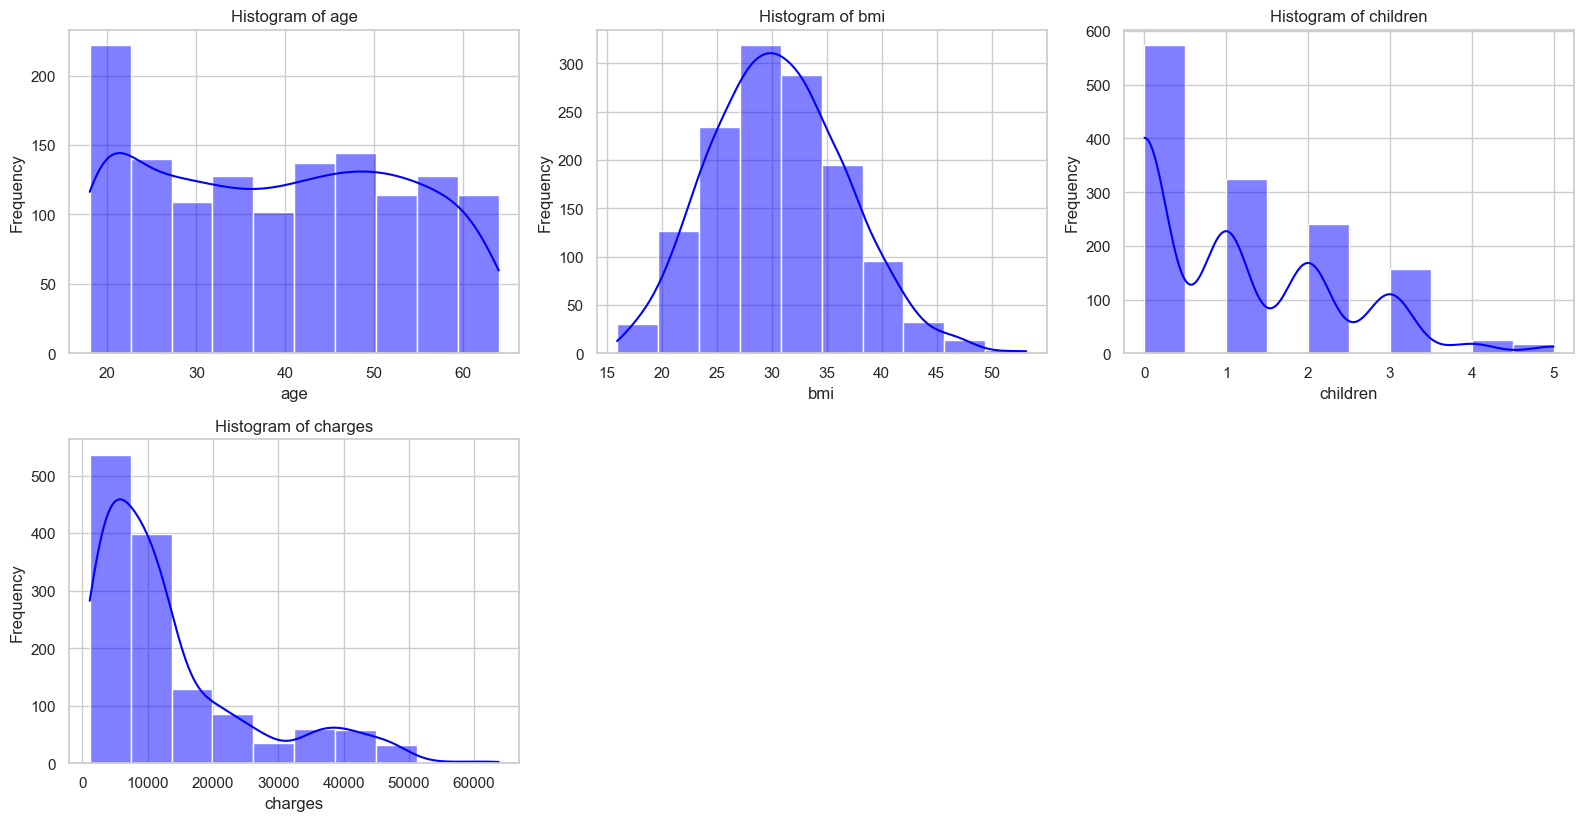

In [78]:
# Visualization Techniques

# Set up the plotting style
sns.set(style="whitegrid")

# List of numerical columns
numeric_cols = ['age', 'bmi', 'children', 'charges']

# Plot histograms for each numerical column
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=10, color='blue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 2.1.1 Boxplots to Spot Outliers

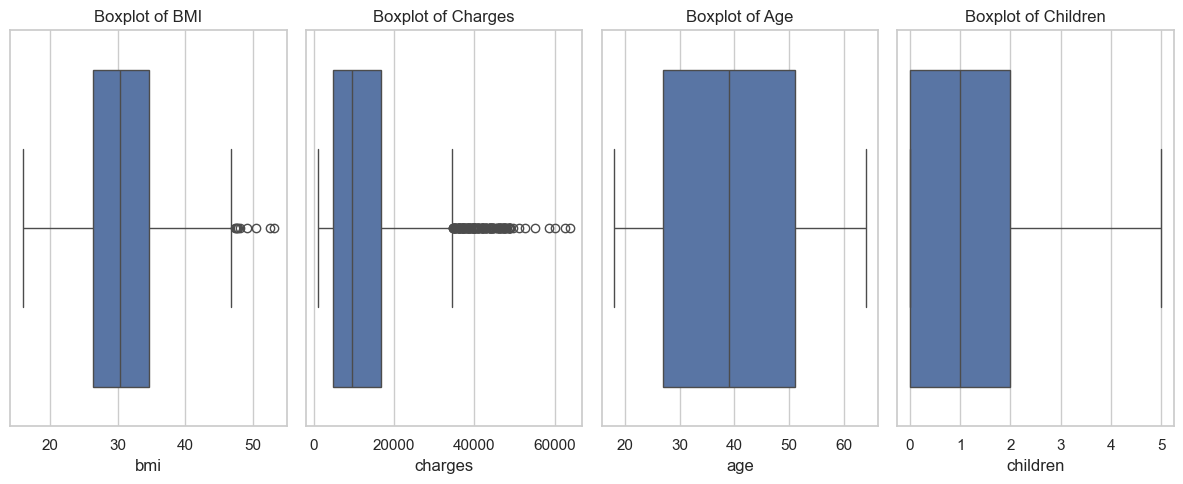

In [79]:
# Boxplots for BMI and Charges
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
sns.boxplot(x=df["bmi"])
plt.title("Boxplot of BMI")

plt.subplot(1, 4, 2)
sns.boxplot(x=df["charges"])
plt.title("Boxplot of Charges")

plt.subplot(1, 4, 3)
sns.boxplot(x=df["age"])
plt.title("Boxplot of Age")

plt.subplot(1, 4, 4)
sns.boxplot(x=df["children"])
plt.title("Boxplot of Children")

plt.tight_layout()
plt.show()

### 2.1.2 Count Plots for Categorical Variables

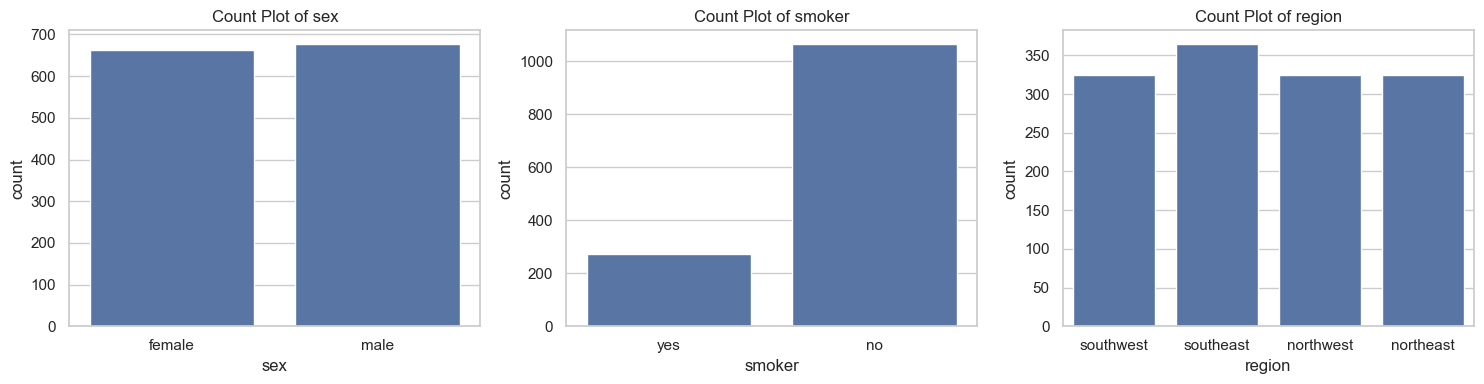

In [80]:
# Count plots for categorical variables
categorical_cols = ['sex', 'smoker', 'region']

plt.figure(figsize=(15, 4))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

### 2.2 Handle missing values and clean data

The dataset has no missing values, so no imputation or row removal is needed. While outliers exist in the BMI and charges columns, they may reflect real medical costs and are retained for now. Categorical variables (sex, smoker, region) will be encoded numerically in the next step.

In [81]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first to avoid multicollinearity
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


### 2.3 Feature selection and engineering

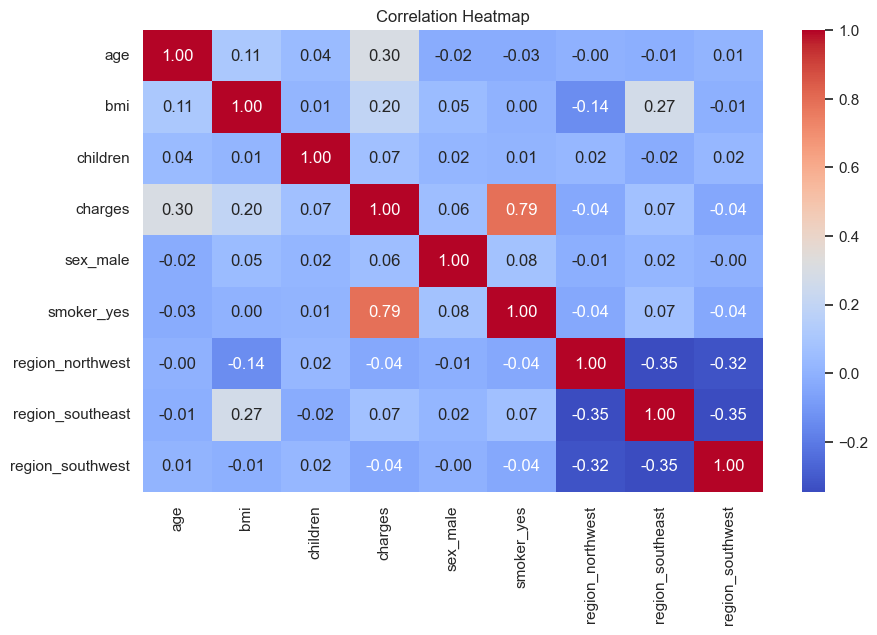

In [ ]:
# Correlation heatmap to explore feature relationships
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Store target and features
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Scale features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Reflection 2: 
Exploration revealed a strong right skew in medical charges, driven by a few high-cost cases—likely linked to smoking, which stood out as a major cost driver. BMI ranged mostly between 25–35, with a few higher outliers. The dataset had no missing values, so minimal cleaning was needed. Categorical variables were one-hot encoded for modeling.

# Section 3. Feature Selection and Justification

### 3.1 Choose Features and Target

I chose charges as the target because that’s the value I’m trying to predict "how much someone pays for insurance". 
For the features, I included everything else. Factors like smoker status, age, and BMI clearly impact cost.

To set things up, I assigned X to all columns except charges, and y to just the charges column.

### 3.2 Define X and y

In [83]:
# Define input features (X) and target (y)

# X is everything except the target column
X = df_encoded.drop('charges', axis=1)

# y is the target variable
y = df_encoded['charges']

# Preview the shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1338, 8)
y shape: (1338,)


Reflection 3:  Why did you choose these features? How might they impact predictions or accuracy?

I chose charges as the target because it represents the insurance cost I want to predict. For the features, I included all other columns since each could potentially influence the final charges. Variables like smoker status, age, and BMI are directly linked to health risks and are likely to have a strong impact on insurance costs. Even if some features contribute less on their own, they may still improve accuracy when used together in the model.

# Section 4. Train a Model (Linear Regression)

### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

In [84]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (1070, 8)
Test set size: (268, 8)


### 4.2 Train model using Scikit-Learn model.fit() method

In [85]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 4.3 Evalulate performance:

In [86]:
#  Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

MAE:  4181.19
RMSE: 5796.28
R²:   0.78


Reflection 4: How well did the model perform? Any surprises in the results?
The linear regression model performed better, with an R² score of 0.78, meaning it explained most of the variance in charges. The MAE was around 5,796, so while predictions were generally solid, there were some larger errors—likely due to outliers. Overall, the model did well for a basic setup, and there's room for improvement.

# Section 5. Improve the Model or Try Alternates (Implement Pipelines)

### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline 1: StandardScaler + Linear Regression
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit and predict
pipeline1.fit(X_train, y_train)
y_pred1 = pipeline1.predict(X_test)

# Metrics
r2_1 = r2_score(y_test, y_pred1)
mae_1 = mean_absolute_error(y_test, y_pred1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred1))

print(f"Pipeline 1 - Scaled Linear Regression")
print(f"R² Score: {r2_1:.4f}")
print(f"MAE: ${mae_1:,.2f}")
print(f"RMSE: ${rmse_1:,.2f}")

Pipeline 1 - Scaled Linear Regression
R² Score: 0.7836
MAE: $4,181.19
RMSE: $5,796.28


### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.

In [88]:
from sklearn.preprocessing import PolynomialFeatures

# Pipeline 2: PolynomialFeatures (degree=3) + StandardScaler + Linear Regression
pipeline2 = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit and predict
pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_test)

# Metrics
r2_2 = r2_score(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))

print(f"Pipeline 2 - Polynomial Regression (Degree 3)")
print(f"R² Score: {r2_2:.4f}")
print(f"MAE: ${mae_2:,.2f}")
print(f"RMSE: ${rmse_2:,.2f}")

Pipeline 2 - Polynomial Regression (Degree 3)
R² Score: 0.8486
MAE: $2,937.92
RMSE: $4,847.50


### 5.3 Compare performance of all models across the same performance metrics

In [89]:
def evaluate_model(name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}")
    print(f"  MAE:  {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²:   {r2:.2f}")
    print("-" * 30)

evaluate_model("Baseline Linear Regression", y_test, y_pred)
evaluate_model("Pipeline 1: Scaled Linear Regression", y_test, y_pred1)
evaluate_model("Pipeline 2: Polynomial (deg=3) + Scaled Linear Regression", y_test, y_pred2)

Baseline Linear Regression
  MAE:  4181.19
  RMSE: 5796.28
  R²:   0.78
------------------------------
Pipeline 1: Scaled Linear Regression
  MAE:  4181.19
  RMSE: 5796.28
  R²:   0.78
------------------------------
Pipeline 2: Polynomial (deg=3) + Scaled Linear Regression
  MAE:  2937.92
  RMSE: 4847.50
  R²:   0.85
------------------------------


Reflection 5: Which models performed better? How does scaling impact results?

Pipeline 2 (Polynomial Regression) performed better than Pipeline 1, with a higher R² and lower MAE/RMSE. Scaling didn’t affect the linear regression model, as it doesn’t impact linear relationships. The polynomial features helped capture more complex patterns, improving predictions and showing that some relationships in the data are nonlinear.

# Section 6. Final Thoughts & Insights

### 6.1 Summarize findings.
The goal ofthis project was to predict insurance charges using features like age, BMI, and smoker status. Smoker status had the greatest impact on charges. A basic linear regression model performed decently, and scaling slightly improved results. Pipeline 2 with polynomial features gave the best performance, providing higher accuracy and better predictions by capturing more complex patterns.

### 6.2 Discuss challenges faced.

I faced the challenge of dealing with outliers in the bmi and charges columns. These outliers could significantly affect model performance, particularly for linear regression. I decided to retain them because they might reflect real medical costs.

### 6.3 If you had more time, what would you try next?
With more time, I'd focus on refining the model through better outlier handling, enhanced feature engineering, and model tuning. I’d also explore alternative algorithms to boost accuracy and interpretability.

### Reflection 6: What did you learn from this project?

This project taught me the full machine learning process: from cleaning and exploring data to building and tuning models. I learned how scaling and feature engineering improve predictions.